参考ページ：https://cream-kuchen.hatenablog.com/entry/python_technical_analysis

In [29]:
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()

In [20]:
str_date = datetime(2020,9,30)
end_date = datetime(2021,12,31)
df = pdr.DataReader(['NIKKEI225'], 'fred', str_date, end_date)

df.rename(columns={"NIKKEI225" : 'price'}, inplace=True)
df = df.loc[~df['price'].isnull()]
df.head()

,price
DATE,
2020-09-30,23185.12
2020-10-01,23185.12
2020-10-02,23029.90
2020-10-05,23312.14
2020-10-06,23433.73


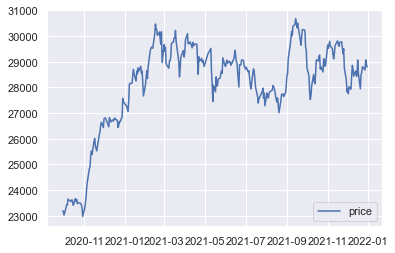

In [30]:
plt.plot(df.index, df['price'], label='price')
plt.legend(loc='lower right')
plt.show()

In [22]:
df['chg_price'] = df['price'].pct_change()
plt
df.head()

,price,chg_price
DATE,,
2020-09-30,23185.12,NaN
2020-10-01,23185.12,0.000000
2020-10-02,23029.90,-0.006695
2020-10-05,23312.14,0.012255
2020-10-06,23433.73,0.005216


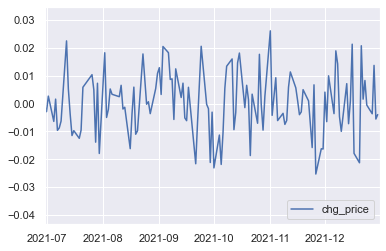

In [31]:
plt.plot(df.index, df['chg_price'], label='chg_price')
plt.legend(loc='lower right')
plt.xlim(datetime(2021,6,30), datetime(2021,12,31))
plt.show()

In [24]:
DAY = 5
df['mov_avg_price'] = df['price'].rolling(window=DAY, min_periods=DAY).mean()
df.head()

,price,chg_price,mov_avg_price
DATE,,,
2020-09-30,23185.12,NaN,NaN
2020-10-01,23185.12,0.000000,NaN
2020-10-02,23029.90,-0.006695,NaN
2020-10-05,23312.14,0.012255,NaN
2020-10-06,23433.73,0.005216,23229.202


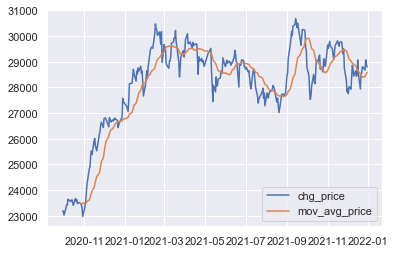

In [32]:
plt.plot(df.index, df['price'], label='chg_price')
plt.plot(df.index, df['mov_avg_price'], label='mov_avg_price')
plt.legend(loc='lower right')
plt.show()

In [26]:
DAY = 20

# 単純移動平均
df['mov_avg_price'] = df['price'].rolling(window=DAY, min_periods=DAY).mean()

# 標準偏差
df['std_price'] = df['price'].rolling(window=DAY, min_periods=DAY).std()

# 単純移動平均から2シグマの乖離
df['bolb_plus1'] = df['mov_avg_price'] + 1*df['std_price']
df['bolb_minus1'] = df['mov_avg_price'] - 1*df['std_price']

# 単純移動平均から2シグマの乖離
df['bolb_plus2'] = df['mov_avg_price'] + 2*df['std_price']
df['bolb_minus2'] = df['mov_avg_price'] - 2*df['std_price']

# ボリンジャーバンドと株価の乖離率
df['diff_bolb_plus2'] = np.log(df['bolb_plus2'] / df['price'])
df['diff_bolb_minus2'] = np.log(df['price'] / df['bolb_minus2'])

df.tail()

,price,chg_price,mov_avg_price,std_price,bolb_plus1,bolb_minus1,bolb_plus2,bolb_minus2,diff_bolb_plus2,diff_bolb_minus2
DATE,,,,,,,,,,
2021-12-24,28782.59,-0.000548,28398.7245,380.533196,28779.257696,28018.191304,29159.790892,27637.658108,0.013020,0.040591
2021-12-27,28676.46,-0.003687,28418.3515,384.403660,28802.755160,28033.947840,29187.158820,27649.544180,0.017652,0.036467
2021-12-28,29069.16,0.013694,28480.7215,383.706800,28864.428300,28097.014700,29248.135099,27713.307901,0.006138,0.047765
2021-12-29,28906.88,-0.005583,28529.2845,372.381763,28901.666263,28156.902737,29274.048027,27784.520973,0.012622,0.039601
2021-12-30,28791.71,-0.003984,28581.2015,328.281948,28909.483448,28252.919552,29237.765396,27924.637604,0.015374,0.030578


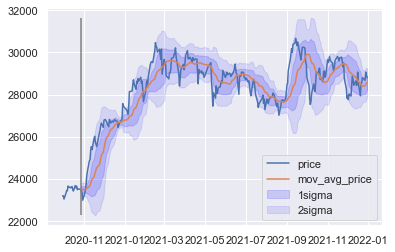

In [33]:
plt.plot(df.index, df['price'], label='price')
plt.plot(df.index, df['mov_avg_price'], label='mov_avg_price')
plt.fill_between(df.index, df['bolb_minus1'], df['bolb_plus1'],
                 label='1sigma', color='blue', alpha=0.15)
plt.fill_between(df.index, df['bolb_minus2'], df['bolb_plus2'],
                 label='2sigma', color='blue', alpha=0.1)
plt.vlines(df.index[DAY-1], df['bolb_minus2'].min(), df['bolb_plus2'].max(),
           colors='gray')
plt.legend(loc='lower right')
plt.show()
